# Plot Radar Data

### This notebook demonstrates plotting NEXRAD level 2 data using Python. Note that these are .ar2v formatted files. AWS has...

### Import Packages

In [ ]:
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.calc import azimuth_range_to_lat_lon
from metpy.plots import colortables, USSTATES, USCOUNTIES
from metpy.plots import add_metpy_logo
import numpy as np
from siphon.catalog import TDSCatalog
import xarray as xr

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#BTW, you can check on the version of any module...
xr.__version__

## Get Data from https://thredds.ucar.edu/thredds/catalog/catalog.html
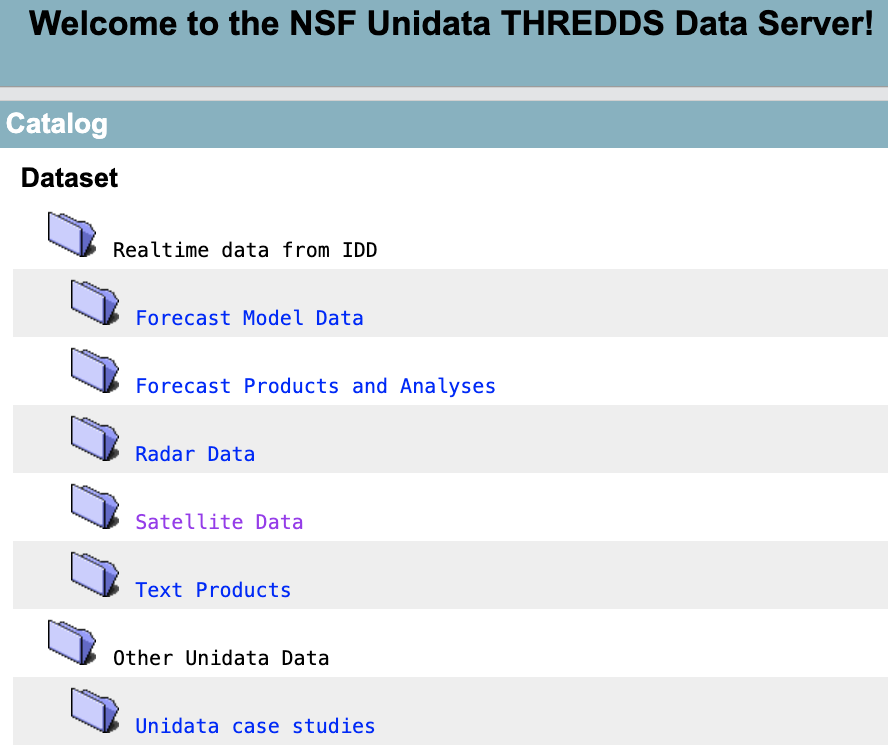


In [ ]:
#Pull most recent reflectivity data
#date = datetime.utcnow()   #Most recent

YYYY, mm, dd, hh = [2024, 11, 19, 16]
date = datetime(YYYY, mm, dd, hh)

# Create variables for URL generation, starting with radar name 
# For available radars see https://thredds.ucar.edu/thredds/catalog/nexrad/level2/catalog.html
station = 'KMLB'

# Construct the data_url string (Unidata THREDDS server). Note that this is level 2 data
data_url = (f'https://thredds.ucar.edu/thredds/catalog/nexrad/level2/{station}/{date:%Y%m%d}/catalog.html')

# Get list of files available for particular day
cat = TDSCatalog(data_url)

# Grab dataset for desired time
dataset = cat.datasets.filter_time_nearest(date)

#Open file with xarray
ds = xr.open_dataset(dataset.access_urls['OPENDAP'], decode_times=False,
                     decode_coords=False, mask_and_scale=True)

In [ ]:
#What does dataset return?


In [ ]:
#What's in the dataset?


In [ ]:
#Pathname for the file on the Unidata THREDDS server 


## Parse Data, Create Lat/Lon

In [ ]:
station = 
slat = 
slon = 
elevation = 
vtime = datetime.strptime(ds.time_coverage_start, '%Y-%m-%dT%H:%M:%SZ')
sweep = 0
rng = 
az = 
ref = 

#DRL Convert azimuth and range locations in a polar coordinate system to lat/lon coordinates. 
#  See https://unidata.github.io/MetPy/v1.5/api/generated/metpy.calc.azimuth_range_to_lat_lon.html

lon, lat = 


In [ ]:
#Diagnostics?  print(), np.shape()


## Make Plot. For colortable options see: https://unidata.github.io/MetPy/v1.5/api/generated/metpy.plots.ctables.html 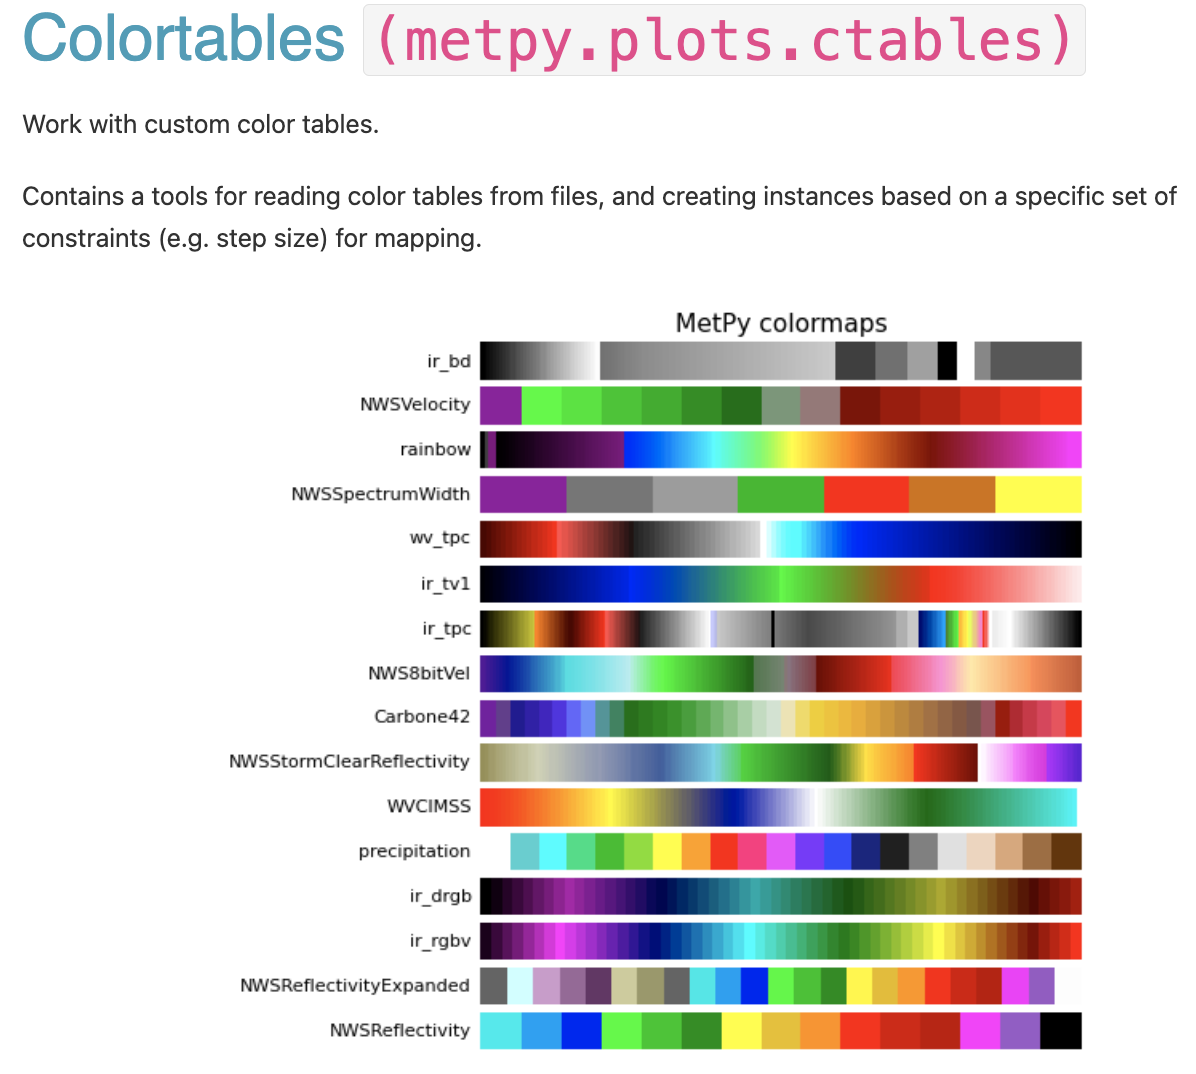


In [ ]:
#Set a radar reflectivity colormap
cmap = colortables.get_colortable('NWSStormClearReflectivity')

#Florida Zoom!
min_lon = 
max_lon = 
min_lat =  
max_lat =  


fig, ax = plt.subplots(1, 1, figsize=(10, 9), subplot_kw=dict(projection=ccrs.PlateCarree()))

#Set range in reflectivity values and add colorbar
img = 
plt.colorbar(img, aspect=50, pad=0)

#Set extent aspect ratio
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())
ax.set_aspect('equal', 'datalim')

ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='darkgrey', linewidth = 0.25)
ax.add_feature(USSTATES.with_scale('5m'), linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'black', linewidth = 1,
               facecolor=cfeature.COLORS['water'], alpha=0.25, zorder=-1)

#Add MetPy Logo

#Plot Title


#Draw plot
plt.show()

In [ ]:
#Pull radial velocity 
station = 
rngv = 
azv = 
#DRL add radial velocity
vr  = 

#DRL Convert azimuth and range locations in a polar coordinate system to lat/lon coordinates. 
#  See https://unidata.github.io/MetPy/v1.5/api/generated/metpy.calc.azimuth_range_to_lat_lon.html
lonv, latv = 

np.shape(vr) #Note that vr is a 3D array. We need a 2D in order to plot below!
#Shape looks like tilt, azimuth, range 

In [ ]:
#Collapse the first dimension ov vr so that 3D --> 2D 
vrf =                #DRL use lowest tilt
np.shape(vrf)

In [ ]:
#Set up a radar radial velocity colormap
#Could also use: 'NWSVelocity')  
cmap = colortables.get_colortable('NWS8bitVel')  

#Florida Zoom!  (Cut and paste from above!)




fig, ax = plt.subplots(1, 1, figsize=(10, 9), subplot_kw=dict(projection=ccrs.PlateCarree()))

#Set range in radial velocity
img = 
plt.colorbar(img, aspect=50, pad=0)

ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())
ax.set_aspect('equal', 'datalim')

ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='darkgrey', linewidth = 0.25)
ax.add_feature(USSTATES.with_scale('5m'), linewidth = 0.5)
ax.add_feature(cfeature.LAKES, edgecolor = 'black', linewidth = 1,
               facecolor=cfeature.COLORS['water'], alpha=0.25, zorder=-1)

add_metpy_logo(fig, 100, 15, size='small')

# Add title

plt.show()

DRL Amazon Bucket has real-time data as well - and a much longer archive 
https://registry.opendata.aws/noaa-nexrad/
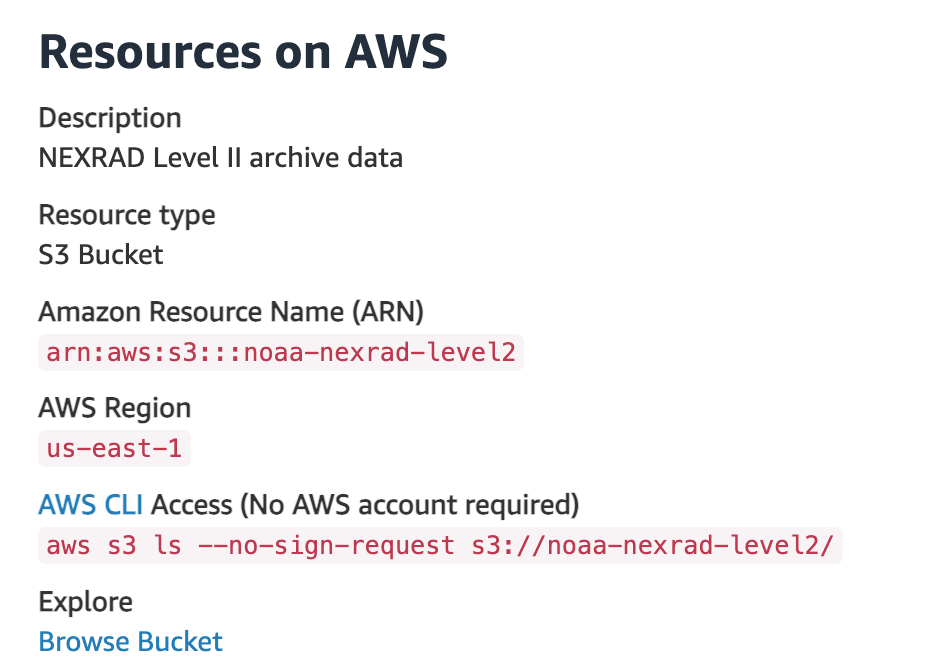